<h2>Setting up imports...</h2>

In [79]:
%tensorflow_version 2.x
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
print(tf.__version__)
print(keras.__version__)
print(np.__version__)

2.2.0-rc2
2.3.0-tf
1.18.2


<h2>...Importing hw_3problem_1.py code...</h2>

data.shape is (5000, 2)
labels.shape is (5000, 1)


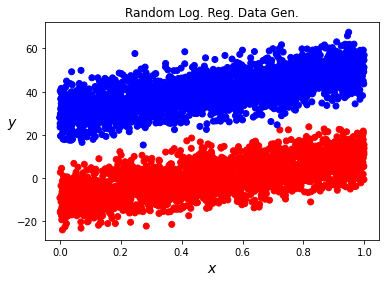

In [80]:
def get_random_data(w, b, mu, sigma, m):
    data, labels = np.zeros((m, 2)), np.zeros((m, 1), dtype=int)
    for i in range(m):
        c = random.randrange(0, 2)
        x_1 = random.random()
        n = np.random.default_rng().normal(mu, sigma, 1)
        x_2 = w * x_1 + b + (-1)**c * n
        data[i, 0], data[i, 1] = x_1, x_2
        labels[i] = c
    return (data, labels)

def display_random_data(labels, data):
    datax, datay = np.split(data,[-1], axis = 1)
    pltclrs = ["red" if val == 1 else "blue" for val in labels]
    plt.scatter(datax, datay, c = pltclrs)
    plt.title("Random Log. Reg. Data Gen.")
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", rotation=0, fontsize=14)
    plt.show()

w, b, mu, sigma, m = 20, 10, 20, 6, 5000
data, labels = get_random_data(w, b, mu, sigma, m)
print("data.shape is", data.shape)
print("labels.shape is", labels.shape)
display_random_data(labels, data)

traindata, testdata = np.split(data, [int(0.8 * data.shape[0])])
trainlbl, testlbl = np.split(labels, [int(0.8 * labels.shape[0])])

def get_train_set():
    return (traindata, trainlbl)
def get_test_set():
    return (testdata, testlbl)
def get_w_and_b():
    return (w, b)

<h2>...Defining functions...</h2>

All functions are defined [here](https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf), where:

the sigmoid function is defined as $\sigma(x) = \dfrac{1}{(1+e^{-z})}$,

the derivative of the sigmoid function is defined as $\sigma'(x) = \sigma(x) * (1 - \sigma(x))$,

& the binary cross entropy loss function is defined as $L_{bce} = (-y)log(a) - (1-y)log(1-a)$.


In [0]:
# sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# sigmoid prime, the derivative of sigmoid, function 
def sigmoid_d(z): 
    return sigmoid(z) * (1 - sigmoid(z))

# binary cross-entropy loss function
def bce_loss(y, z):
    return (-y * np.log(sigmoid(z))) - ((1 - y) * np.log(1 - sigmoid(z)))

<h2>...Defining values & stochastic gradient...</h2>


In [82]:
# stochastic gradient descent

#initial values
epochs, lr, weights, bias = 500, 0.01, np.random.rand(2), np.zeros(1)
print("Weights & bias initialization =", weights, bias)
rdata, rlabel = get_train_set()
rdatax, rdatay = rdata[:, 0], rdata[:, 1]
tdata, tlabel = get_test_set()
tdatax, tdatay = tdata[:, 0], tdata[:, 1]

# loop through cycle (epoch) amount
for epoch in range(epochs):
  # shuffle
  s_indices = np.random.permutation(tdatax.shape[0])
  rdata_s = rdata[s_indices]
  rlabel_s = rlabel[s_indices]

  # loop through training data
  for rdx, rdy in zip(rdata_s, rlabel_s):
      # calculate values (for log. reg., a is equivalent to sigmoid(z))
      z = np.dot(rdx, weights) + bias
      dlce = sigmoid(z) - rdy 

      # update values
      weights[0] = weights[0] - lr * (dlce * rdx[0])
      weights[1] = weights[1] - lr * (dlce * rdx[1])
      bias = bias - lr * dlce

print("Weights & bias after estimation =", weights, bias)

Weights & bias initialization = [0.95646122 0.53159289] [0.]
Weights & bias after estimation = [ 8.37947537 -0.53312423] [7.88405372]


<h2>...Computing binary cross entropy loss and accuracy...</h2>

In [84]:
correct, loss, accuracy = 0, 0, 0

# loop through testing data
for tdx, tdy in zip(tdata, tlabel):
    z = np.dot(tdx, weights)
    loss = loss + bce_loss(tdy, z)

    # check accuracy
    if int(np.round(sigmoid(z))) == tdy:
      correct += 1

    loss = loss / tdatax.shape[0]
    accuracy = (correct / tdatax.shape[0]) * 100

print("Loss =", loss, "Accuracy =", accuracy)

Loss = [2.07865311e-06] Accuracy = 95.1


<h2>...Printing out the data...</h2>

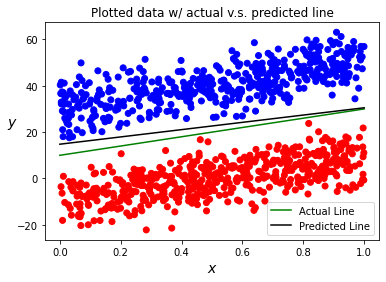

In [85]:
# Plot actual data
pltclrs = ["red" if val == 1 else "blue" for val in tlabel]
#pltlbls = ["Label = 1" if val == 1 else "Label = 0" for val in tlabel]
plt.scatter(tdatax, tdatay, c = pltclrs)

# Plot actual reg. line
truew, trueb = get_w_and_b()
truex, truey = [0, 1], [trueb, truew + trueb]
plt.plot(truex, truey, "green", label = "Actual Line")

# Plot predicted reg. line
weights = np.reshape(weights, (-1, 1))
predx = [0, 1]
predy = (-bias/weights[1]) + (-weights[0]/weights[1]) * predx
plt.plot(predx, predy, "black", label = "Predicted Line")
plt.title("Plotted data w/ actual v.s. predicted line")
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", rotation = 0, fontsize = 14)
plt.legend()
plt.show()

<h2>...And printing out the heatmap...</h2>

Locator attempting to generate 5001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


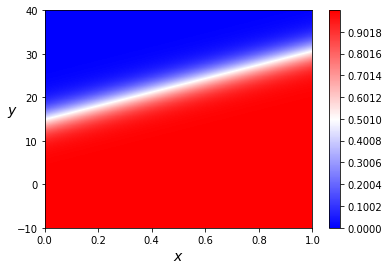

In [86]:
# build heatmap
xln, yln = np.meshgrid(np.linspace(0,1), np.linspace(-10, 40))
z = weights[0] * xln + weights[1] * yln + bias
plt.contourf(xln, yln, sigmoid(z), m, cmap = "bwr")
plt.colorbar()
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", rotation = 0, fontsize = 14)
plt.show()

<h2> Sources used: </h2>

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf
https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-
https://colab.research.google.com/drive/1wi8Jr04k0ja4mzIpqcNJ4c4ZhGiM46w3